# Project: Wrangling and Analyze Data

## Introduction

This project is part of the coursework leading to Udacity's Data Analysis Nanodegree (DAND). Its objective is to demonstrate skills for the Data Wrangling phase of the Data Analysis Process. Data Wrangling is a key part in analytics, and is typically described as the one where analysts and data scientists spend the most part of their time.

The project gathers data from different sources related to the WeRateDogs twitter account, which posts and rates photos of folowers' dogs. After assessing and cleaning the data, reports are written to communicate the results of an initial analysis.

The data wrangling and analysis proccess will lead in answering:
> 1. What are the Top Ten most rated dog breeds
> 2. What are the Ten Least Rated dog breeds.
> 3. What dog breed has the most retweet count.
> 4. What Dod Breed is the most favorite and what do stage does it belong

## Data Gathering


> The WeRateDogs data has three different data sets which have to be loaded. These data sets come in different formats, as such they have to be loaded using different methods.

In [1]:
#Importing packages to be used 
import pandas as pd
import numpy as np
import requests
import os
import json

In [2]:
#Load the WeRateDogs twitter archive data directly
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
#Download the tweet image prediction using programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# Create the request
response = requests.get(url)
#Accessing the content and writing it in a file
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)
predictions_df = pd.read_csv('image-predictions.tsv', sep ='\t')
predictions_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [4]:

json_df = []
with open('tweet_json.txt', 'r') as f:
    data = f.readlines()
    data = [json.loads(d) for d in data]
with open('reformatted_tweet_json', 'w', encoding='UTF-8') as f:
    json.dump(data, f)
json_df = pd.read_json('reformatted_tweet_json')


In [5]:
#Get the required columns from the created data frame
tweet_df = json_df[['id', 'retweet_count', 'favorite_count']]
tweet_df.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467


###### Now we have gathered our THREE data sets namely archive_df, prediction_df, and tweet_df

### ASSESSING THE DATA

* This is the process of checking for Quality issues and Tydiness issues in the data. Data with quality issues has issues with the content such as duplicates, missing values, or incorrect data and it is otherwise known as dirty data. Tydiness on the other hand are structural issues that rather slow down the data cleaning, analysis, visualizaton, and modeling later on.

* These Two inssues can be detected using two way; visually and programatically. Once an issue is detectd, it is only recorded first, the cleaning will take place later on.

#### Visual Assessment
* This is done in order to get well aquinted with the data and understand it. This helps in identifying tydiness issues.

In [6]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
1772,678278586130948096,NaN,NaN,2015-12-19 18:19:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another spooky pupper here. Most definitely fl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678278586...,10,10,None,None,None,pupper,None
159,860981674716409858,NaN,NaN,2017-05-06 22:16:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Lorenzo. He's an avid nift...,8.605638e+17,4.196984e+09,2017-05-05 18:36:06 +0000,https://www.gofundme.com/help-lorenzo-beat-can...,13,10,Lorenzo,None,None,None,None
143,864197398364647424,NaN,NaN,2017-05-15 19:14:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Paisley. She ate a flower just to prov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864197398...,13,10,Paisley,None,None,None,None
2314,666701168228331520,NaN,NaN,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666701168...,8,10,a,None,None,None,None


In [8]:
archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


###### Archive_df
* Assessing the data visually I can see that:
> 1. The timestamp column contains both time nad date, which should be looked into.
> 2. Some of the last rows indicate the name of the dog as 'a'.
> 3. Inplace of doggo, floofer, puppa, and puppo, the values are represented by 'None'.

In [9]:
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1217,743595368194129920,https://pbs.twimg.com/media/ClHICHmXEAI_1PS.jpg,1,hippopotamus,0.505675,False,hog,0.370726,False,warthog,0.018827,False
528,676776431406465024,https://pbs.twimg.com/ext_tw_video_thumb/67677...,1,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False
371,672980819271634944,https://pbs.twimg.com/media/CVbodBOUsAAb7jZ.jpg,1,car_mirror,0.232754,False,basset,0.219461,True,beagle,0.112397,True
548,677334615166730240,https://pbs.twimg.com/media/CWZgPPUWUAAUOvu.jpg,2,Lakeland_terrier,0.859392,True,Airedale,0.067292,True,Irish_water_spaniel,0.049531,True
1174,737322739594330112,https://pbs.twimg.com/media/Cjt_Hm6WsAAjkPG.jpg,1,guinea_pig,0.148526,False,solar_dish,0.097183,False,park_bench,0.059312,False


In [11]:
predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


##### Predicitons_df
> 1. Coulumn names P1, P2, and P3 should be more descriptive.
> 2. Capitalization in dog names should be uniform

In [12]:
tweet_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [13]:
tweet_df.sample(5)

,id,retweet_count,favorite_count
447,819006400881917954,21794,49960
1991,672609152938721280,424,1180
32,885984800019947520,7097,33382
124,868622495443632128,6275,28295
421,821813639212650496,3839,0


In [14]:
tweet_df.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


## Programatic Assessment

### Archive_df

In [15]:
# looking at the brief statstical review 
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
tweet_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [17]:
predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#Checking the column data types
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [21]:
# Checking for duplicates in the three data sets
print('The number of duplicates in Archive Data is {}'.format(archive_df.duplicated().sum()))
print('The number of duplicates in Tweet Data is {}'.format(tweet_df.duplicated().sum()))
print('The number of duplicates in the Predictions Data is {}'.format(predictions_df.duplicated().sum()))

The number of duplicates in Archive Data is 0
The number of duplicates in Tweet Data is 0
The number of duplicates in the Predictions Data is 0


In [22]:
#inspecting the names
archive_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

> We have 745 'None' and 55 'a' values.
> The data type is an integer, which is okay.

In [23]:
tweet_df.value_counts()

id                  retweet_count  favorite_count
666020888022790149  532            2535              1
776249906839351296  10673          0                 1
773985732834758656  4492           11925             1
774314403806253056  6478           24167             1
774639387460112384  2013           7508              1
                                                    ..
687732144991551489  750            1935              1
687807801670897665  801            2625              1
687818504314159109  1080           2758              1
687826841265172480  1292           2989              1
892420643555336193  8853           39467             1
Length: 2354, dtype: int64

In [24]:
predictions_df.value_counts()

tweet_id            jpg_url                                          img_num  p1                      p1_conf   p1_dog  p2                           p2_conf   p2_dog  p3                        p3_conf   p3_dog
666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg  1        Welsh_springer_spaniel  0.465074  True    collie                       0.156665  True    Shetland_sheepdog         0.061428  True      1
761292947749015552  https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg  1        standard_poodle         0.660893  True    Samoyed                      0.314886  True    miniature_poodle          0.008834  True      1
767122157629476866  https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg  2        toy_poodle              0.873841  True    miniature_poodle             0.059192  True    Irish_terrier             0.035306  True      1
766793450729734144  https://pbs.twimg.com/media/CqQykxrWYAAlD8g.jpg  1        beagle                  0.451697  True    basset                   

## Quality Issues

### Archive_df
> 1. The timestamp column has a wrong data type
> 2. Doggo, floofer,pupper,puppo had many values represneted as 'None'.
> 3. Ratings not equal to 10 should be removed.
> 4. 181 non null values in the columns in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
> 5. 78 non null values in the in_reply_to status_id, and in_reply_to_user_id
> 6. Wrong data type for tweet_id

### Predictions_df
> 1. Wrong data type for tweet_id
> 2. Predictions are spread over three columns

## Tidyness Issues

### Tweets_df
> 1. Tweet id is just as id, needs renaming for uniformity

### Archive_df
> 1. The Dog names are not uniform, some are capitalized.
> 2. The dog stages: Doggo, Floofer, pupper, puppo are spread over 4 columns

### Predictions_df
> 1. Merging all the data sets into 1 using the tweet id.

## Cleaning

In [25]:
# Make copies of original datasets

archive_clean = archive_df.copy()
predictions_clean = predictions_df.copy()
tweets_clean = tweet_df.copy()

#### Issue 1 

#### Define
Change the column name of the tweet identification from id to tweet_id, for uniformity with the other data sets

#### Code

In [26]:
# Looking at the current column names
tweets_clean.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [27]:
#Chnaging the name
tweets_clean.columns = ['tweet_id','retweet_count', 'favorite_count']

#### Test

In [28]:
tweets_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

#### Issue # 2: Timestamp column has wrong data type.

#### Define
Change timestamp datatype in the archive_df from object to datetime type.

#### Code

In [29]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [30]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Issue # 3: Ratings denominator not equal to 10 or numerator greater than 20 should be removed.

#### Define
Drop any rows in rating_denominator not equal to 10 and rating_denominator greater than 20.

#### Code

In [31]:
archive_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [32]:
archive_clean = archive_clean [archive_clean.rating_denominator == 10]

In [33]:
archive_clean.rating_numerator.value_counts()

12      558
11      463
10      461
13      351
9       156
8       102
14       54
7        54
5        37
6        32
3        19
4        15
2         9
1         8
75        2
15        2
420       2
0         2
182       1
666       1
27        1
17        1
1776      1
26        1
Name: rating_numerator, dtype: int64

In [34]:
archive_clean = archive_clean[archive_clean.rating_numerator < 20]

#### Test

In [35]:
archive_clean.rating_denominator.value_counts()

10    2324
Name: rating_denominator, dtype: int64

In [36]:
archive_clean.rating_numerator.value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
14     54
7      54
5      37
6      32
3      19
4      15
2       9
1       8
0       2
15      2
17      1
Name: rating_numerator, dtype: int64

#### Issue # 4: 181 non null values in the columns in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

#### Define
Drop the retweeted_status_id, retweeted_status_user_id, and the retweeted_status_timestamp columns

#### Code



In [37]:
len(archive_clean[archive_clean.retweeted_status_id.notnull()])

179

In [38]:
archive_clean = (archive_clean[archive_clean.retweeted_status_id.isna()])

In [39]:
archive_clean.drop(['retweeted_status_id',
                    'retweeted_status_user_id',
                    'retweeted_status_timestamp'],
                   axis=1, inplace = True)

#### Test

In [40]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Issue # 5: 78 non null values in the in_reply_to status_id, and in_reply_to_user_id

#### Define 
Drop all rows in in_reply_to_status_id, and in_reply_to_user_id

#### Code



In [41]:
len(archive_clean[archive_clean.in_reply_to_status_id.notnull()])

70

In [42]:
archive_clean = (archive_clean[archive_clean.in_reply_to_status_id.isna()])

In [43]:
archive_clean.drop(['in_reply_to_status_id',
                   'in_reply_to_user_id'],
                  axis=1, inplace = True)

#### Test

In [44]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Issue # 6: Predictions are spread over three columns

#### Define
Add two new columns to image predictions for confidence and breed. Highest  confidence level goes in the breed coulmn while matching confidence level goes to the new confidence column.

#### Code

In [45]:
conditions = [(predictions_clean['p1_dog'] == True),
              (predictions_clean['p2_dog'] == True),
              (predictions_clean['p3_dog'] == True)]

# Cretaria for the breed choice
breed_choices = [(predictions_clean['p1']),
         (predictions_clean['p2']),
         (predictions_clean['p3'])]

# Creating the breed column
predictions_clean ['breed'] = np.select(conditions, breed_choices, default = 'none')

# Cretaria for confidence
confidence_choices = [(predictions_clean['p1_conf']),
              (predictions_clean['p2_conf']),
              (predictions_clean['p3_conf'])]

# Creating the confidence column
predictions_clean ['confidence'] = np.select(conditions, confidence_choices, default = 0)

#### Test

In [46]:
predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
1964,867072653475098625,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,1,Blenheim_spaniel,0.352946,True,papillon,0.211766,True,Pekinese,0.112952,True,Blenheim_spaniel,0.352946
1362,761292947749015552,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,1,standard_poodle,0.660893,True,Samoyed,0.314886,True,miniature_poodle,0.008834,True,standard_poodle,0.660893
1855,841314665196081154,https://pbs.twimg.com/ext_tw_video_thumb/84131...,1,Afghan_hound,0.903712,True,Saluki,0.035215,True,bloodhound,0.026565,True,Afghan_hound,0.903712
232,670417414769758208,https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg,1,sea_urchin,0.493257,False,porcupine,0.460565,False,cardoon,0.008146,False,none,0.000000
1528,789137962068021249,https://pbs.twimg.com/media/CvOUw8vWYAAzJDq.jpg,2,Chihuahua,0.746135,True,Pekinese,0.070383,True,Pembroke,0.049237,True,Chihuahua,0.746135


#### Issue # 7:  Wrong tweet_id data type

#### Define
Convert the tweet_id data type in archive_clean, tweet_clean, and predictions_clean from int to string

#### Code

In [47]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
predictions_clean ['tweet_id'] = predictions_clean['tweet_id'].astype(str)
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype(str)

#### Test

In [48]:
print('The tweet_id data type in archive_clean is: {}'.format(archive_clean['tweet_id'].dtypes))
print('The tweet_id data type in predictions_clean is: {}'.format(predictions_clean['tweet_id'].dtypes))
print('The tweet_id data type in tweets_clean is: {}'. format(tweets_clean['tweet_id'].dtypes))

The tweet_id data type in archive_clean is: object
The tweet_id data type in predictions_clean is: object
The tweet_id data type in tweets_clean is: object


#### Issue # 8: The Dog names are not uniform.

#### Define
Change all the dog names to lower case for uniformity

#### Code

In [49]:
archive_clean['name'] = archive_clean['name'].str.lower()

#### Test

In [50]:
archive_clean['name'].value_counts()

none          590
a              54
charlie        11
lucy           11
cooper         10
             ... 
jordy           1
lenox           1
harvey          1
blanket         1
christoper      1
Name: name, Length: 951, dtype: int64

#### Issue # 9: The dog stages: Doggo, Floofer, pupper, puppo are spread over 4 columns

#### Define
The dog stages: Doggo, Floofer, pupper, puppo should be merged into one column. 
We will create a new column for unrecognized dogs(uknown), then melt all coluumns doggo, floofer, ppupper, puppo, and unknown.

#### Code

In [51]:
# create a new column for dog that are not recognized
def unrecognized(dog):
    if dog['doggo'] =='None' and dog['floofer'] == 'None' and dog['pupper'] == 'None' and ['puppo'] == 'None':
        val = 'unknown'
    else:
        val = 'none'
    return val

archive_clean ['unknown'] = archive_clean.apply(unrecognized, axis = 1)

In [52]:
# Check new 'unknown' column has been added
archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,unknown
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,None,None,None,None,none


In [53]:
# Melt the columns doggo, floofer, ppupper, puppo, and unknown to a single one named dog_stage

archive_clean = pd.melt(archive_clean, id_vars = ['tweet_id','timestamp','name', 'rating_numerator','rating_denominator'],
                     value_vars = ['doggo', 'floofer', 'pupper', 'puppo', 'unknown'],
                     var_name = 'dog_stage', 
                        value_name = 'value')

#### Test

In [54]:
archive_clean.head()

,tweet_id,timestamp,name,rating_numerator,rating_denominator,dog_stage,value
0,892420643555336193,2017-08-01 16:23:56+00:00,phineas,13,10,doggo,None
1,892177421306343426,2017-08-01 00:17:27+00:00,tilly,13,10,doggo,None
2,891815181378084864,2017-07-31 00:18:03+00:00,archie,12,10,doggo,None
3,891689557279858688,2017-07-30 15:58:51+00:00,darla,13,10,doggo,None
4,891327558926688256,2017-07-29 16:00:24+00:00,franklin,12,10,doggo,None


#### Issue # 10: Merging Predictions_clean on Tweets_clean dataframe

#### Define
Select Relevant cloumns in each dataset, then join them on tweet_id

#### Code

In [55]:
#selecting relevant columns from the predictions dataframe
predictions_clean = predictions_clean[['tweet_id','breed','confidence']]
predictions_clean.head()

,tweet_id,breed,confidence
0,666020888022790149,Welsh_springer_spaniel,0.465074
1,666029285002620928,redbone,0.506826
2,666033412701032449,German_shepherd,0.596461
3,666044226329800704,Rhodesian_ridgeback,0.408143
4,666049248165822465,miniature_pinscher,0.560311


In [56]:
# Looking at the tweets dataframe sample before merging
tweets_clean.sample(2)

,tweet_id,retweet_count,favorite_count
654,791784077045166082,11271,0
2214,668537837512433665,79,265


In [57]:
#merging the two dataframes
tweets_merged = pd.merge(predictions_clean, tweets_clean,
                        on = 'tweet_id', how = 'left')

#### Test

In [58]:
tweets_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2075 non-null   object 
 1   breed           2075 non-null   object 
 2   confidence      2075 non-null   float64
 3   retweet_count   2073 non-null   float64
 4   favorite_count  2073 non-null   float64
dtypes: float64(3), object(2)
memory usage: 97.3+ KB


#### Issue # 11:  Merging the archive_clean on tweets_merged

#### Define

Combine all the dataframes together and save it to a master file

#### Code

In [59]:
tweet_master = pd.merge(archive_clean,tweets_merged,
                       on = 'tweet_id', how = 'left')

#### Test

In [60]:
tweet_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10375 entries, 0 to 10374
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            10375 non-null  object             
 1   timestamp           10375 non-null  datetime64[ns, UTC]
 2   name                10375 non-null  object             
 3   rating_numerator    10375 non-null  int64              
 4   rating_denominator  10375 non-null  int64              
 5   dog_stage           10375 non-null  object             
 6   value               10375 non-null  object             
 7   breed               9745 non-null   object             
 8   confidence          9745 non-null   float64            
 9   retweet_count       9745 non-null   float64            
 10  favorite_count      9745 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(5)
memory usage: 972.7+ KB


### Storing the Data
Save the three datasets: archive, tweets, and predictions combined as twitter_master



In [61]:
tweet_master.to_csv('twitter_archive_master.csv', index = False)

## Analysis and Visualization

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Distribution 

In [63]:
tweet_master.head()

,tweet_id,timestamp,name,rating_numerator,rating_denominator,dog_stage,value,breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,phineas,13,10,doggo,None,none,0.000000,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,tilly,13,10,doggo,None,Chihuahua,0.323581,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03+00:00,archie,12,10,doggo,None,Chihuahua,0.716012,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,darla,13,10,doggo,None,Labrador_retriever,0.168086,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,franklin,12,10,doggo,None,basset,0.555712,9774.0,41048.0


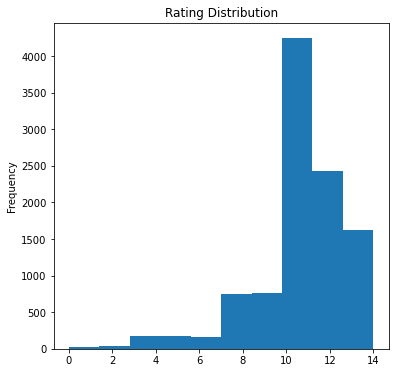

In [64]:

tweet_master.rating_numerator.plot(kind = 'hist', figsize =(6,6), title = 'Rating Distribution');

* The dog rating is skewed to the right.

### Dog Rating by Breed

In [65]:
# Creating a rating dataframe by breed
rating = tweet_master.groupby('breed') ['rating_numerator'].mean().to_frame()


In [66]:
# sorting values in descending order and getting top and bottom ten
rating = rating.sort_values(by='rating_numerator', ascending = False)
top_ten = rating.head(10)
bottom_ten = rating.tail(10)

###### Top Ten Breed

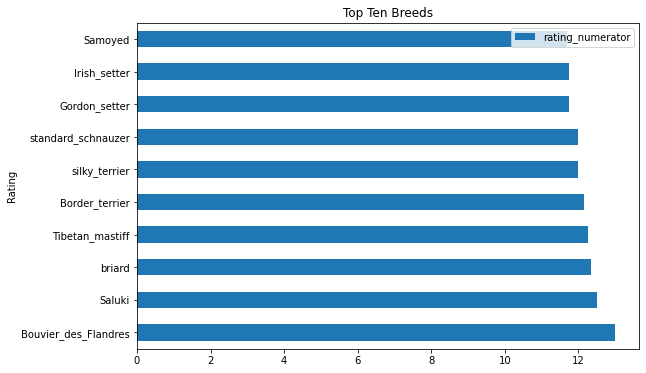

In [74]:
#Plotting
top_ten.plot(kind = 'barh', title = 'Top Ten Breeds', xlabel = 'Rating', figsize =(9,6));

In [ ]:
* The most rated breed is Bouvier Des Flandres followed by Saluki.

##### Bottom Ten Breeds

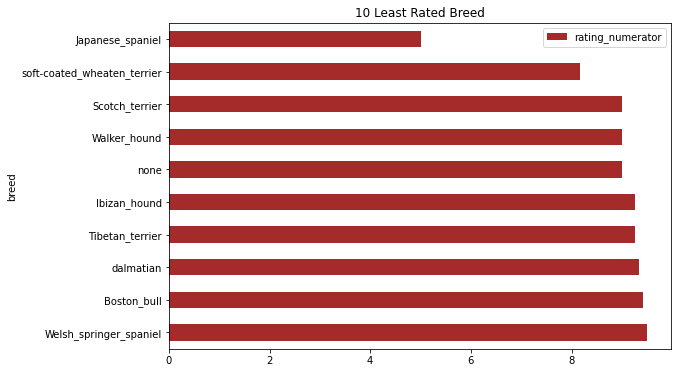

In [73]:
bottom_ten.plot(kind = 'barh', title = '10 Least Rated Breed', color = 'brown', figsize =(9,6));

* The least rated breed is the Japanese Spaniel.

#### Dog Breed with most retweeted count

In [69]:
tweet_master.sort_values(by ='retweet_count', ascending = False).head(1)

,tweet_id,timestamp,name,rating_numerator,rating_denominator,dog_stage,value,breed,confidence,retweet_count,favorite_count
9119,744234799360020481,2016-06-18 18:26:18+00:00,none,13,10,unknown,none,Labrador_retriever,0.825333,79515.0,131075.0


* The labrador Retriever is the dog with the most retweeted count of 79,515.

#### Dog Breed with the most favorite counts

In [70]:
tweet_master.sort_values(by ='favorite_count', ascending = False).head(1)

,tweet_id,timestamp,name,rating_numerator,rating_denominator,dog_stage,value,breed,confidence,retweet_count,favorite_count
325,822872901745569793,2017-01-21 18:26:02+00:00,none,13,10,doggo,None,Lakeland_terrier,0.196015,48265.0,132810.0


* The most favorited dog breed is the Lakeland terrier in the the doggo stage, with about 132,810 favorite count hits.